#### imports

In [2]:
# Science imports
import pandas as pd
import numpy as np
# Viz imports
import matplotlib.pyplot as plt
import seaborn as sns
# Config matplotlib
%matplotlib inline
plt.rcParams["patch.force_edgecolor"] = True # in matplotlib, edge borders are turned off by default. 
sns.set_style("darkgrid") # set a grey grid as a background
# ML imports
import sklearn
from sklearn.model_selection import train_test_split
# turn off warnings
import warnings
warnings.filterwarnings('ignore')

## Analyzing US Housing Data

In [8]:
# Read in the USA Housing data
df = pd.read_csv("USA_Housing.csv")

In [9]:
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [15]:
# 5000 entries, 7 columns. All columns have 5000 entries and are non-null. 
# Most are float64 with one object: Address
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
Avg. Area Income                5000 non-null float64
Avg. Area House Age             5000 non-null float64
Avg. Area Number of Rooms       5000 non-null float64
Avg. Area Number of Bedrooms    5000 non-null float64
Area Population                 5000 non-null float64
Price                           5000 non-null float64
Address                         5000 non-null object
dtypes: float64(6), object(1)
memory usage: 273.5+ KB


In [16]:
# get a quick account of the statistics:
df.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [18]:
df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [19]:
df.index

RangeIndex(start=0, stop=5000, step=1)

### Pairplot the whole dataframe
##### first glances over data
*Notice that:*  
everything is mostly Normally(Gaussian) distributed except for bedrooms  
Bedrooms range mostly from 2-6  
price is from about 300k to 2.4mil  
population is from about 150k-650k  


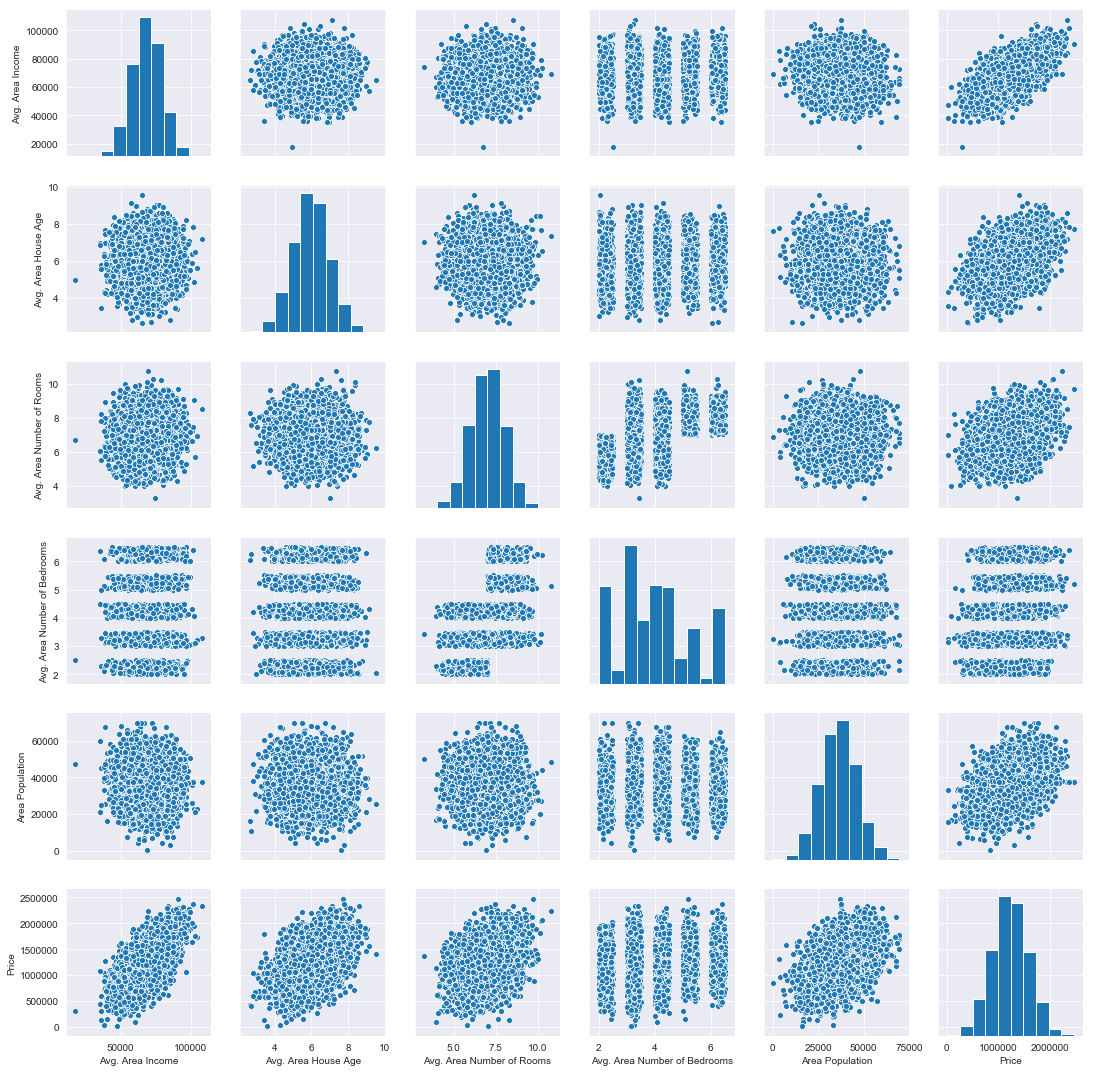

In [20]:
sns.pairplot(df)

*check out the distribution of the price*

In [3]:
sns.distplot(df['Price'])

NameError: name 'df' is not defined

### now make a heatmap of the correlation between each of the columns

**note the positive correlations:**   
-Area Income to Price is positive 
-House Age to Price  
-number of rooms to price  
-area number of bedrooms to price 
-area number of rooms to price  
-area population to price

*also*  
-number of bedrooms to area income  
-home age to number of bedrooms
-home age to number of rooms  
-bedrooms to area number of rooms  
-area number of bedrooms to area income  
et, al

In [28]:
# The matric output
df.corr()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
Avg. Area Income,1.000000,-0.002007,-0.011032,0.019788,-0.016234,0.639734
Avg. Area House Age,-0.002007,1.000000,-0.009428,0.006149,-0.018743,0.452543
Avg. Area Number of Rooms,-0.011032,-0.009428,1.000000,0.462695,0.002040,0.335664
Avg. Area Number of Bedrooms,0.019788,0.006149,0.462695,1.000000,-0.022168,0.171071
Area Population,-0.016234,-0.018743,0.002040,-0.022168,1.000000,0.408556
Price,0.639734,0.452543,0.335664,0.171071,0.408556,1.000000


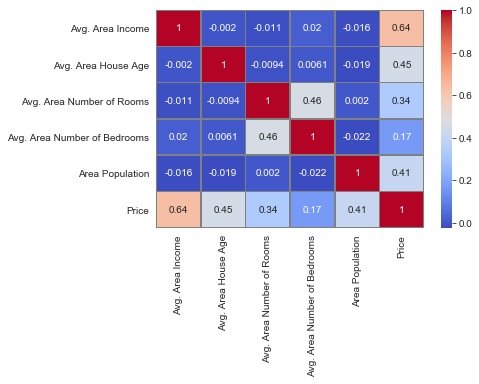

In [101]:
# The Heatmap output. Setting the frames boundries with 'linewidth'
sns.heatmap(df.corr(),cmap='coolwarm',annot=True, linewidths=.5, linecolor='grey')

###  Training a linear regression model with SciKit-Learn

**First split the data into an X-array with the Features to train on and a Y array with the Variable**

In this case the Variable is Price data, which is what we want to predict.

First lets junk the Address column, since the Linear Model can't use text data


In [37]:
df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [102]:
# pass in a list of the column names from the dataframe to make the list
# Features (not price)
# Featured are the Labelled Data in the Supervised Learning model. Price is unlabelled.
# Weird convention: uppercase X to lowercase y
X=df[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population']]

In [42]:
# Y will be Target Variable (Prices). The Unlabelled Data
y=df['Price']

**Now do the Train, Test, Split on the data**  
we want to split the data into a *Training set* for the model, then a *Testing set* once it's been trained.

Syntax example:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

*test_size* - percentage of dataset allocated to test size. .33 is 33% of the total data (typically 30-40) *Optional*     
*random_state* - ensures a set of random splits on the data *Optional*

random_state is useful so that multiple people working the same data get similar results.

In [103]:
# Note the use of tuple unpacking
# We're setting a larger test size (40%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

**Now that we have the data, we need to create the model**

*import the model method from scikit-learn*  

In [46]:
# Syntax: from sklearn.<modelFamily> import <modelname>
from sklearn.linear_model import LinearRegression

 **now instantiate an instance of the model**  

In [47]:
# create the LinearRegression object
lm = LinearRegression()

**Now apply a method to the object**  
This creates the populated model. The Training Model.

In [104]:
# First use the fit method
# Example syntax: lm.fit(X, y, sample_weight=None)
# In this case only fit the model to the Training Data
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

Output looks like:  
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)
         
indicating that the model has been trained

----
**Next step is to evaluate the model and view the coefficients to figure out what we can learn from them**

Grab the intercepts

Syntax: *regression_object_name*.intercept_

In [51]:
lm.intercept_

-2638142.110429267

*See the Coefficients for each Feature*    

In This case 5 features:  
-'Avg. Area Income'  
-'Avg. Area House Age'  
-'Avg. Area Number of Rooms'  
-'Avg. Area Number of Bedrooms'  
-'Area Population'

Syntax: *regression_object_name*.coef_

Returns the array of Features (Labelled Data)

In [105]:
lm.coef_

array([2.15282755e+01, 1.64883282e+05, 1.22368678e+05, 2.23380186e+03,
       1.51504200e+01])

**Make a dataframe based off the coefficients from the Linear Regression Model**

The Coefficients match up with the columns in X (or X_train)


In [54]:
X_train.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population'],
      dtype='object')

In [108]:
# Create the dataframe called cdf with lm.coeff_, X.columns
cdf = pd.DataFrame(lm.coef_,X.columns, columns=['CoEfficient']) #Label the column

In [107]:
cdf

,CoEfficient
Avg. Area Income,21.528276
Avg. Area House Age,164883.282027
Avg. Area Number of Rooms,122368.678027
Avg. Area Number of Bedrooms,2233.801864
Area Population,15.150420


### And boom - we have a model
#### Brief interpretations of the coefficients

<u>If we hold all other features fixed</u>  
*a single unit increase of:*    

- Average Area Income is associated with an average increase in $21.58 in price 

*also*
- Average Area House Age to $166102.50 in price  

- Average Area Number of Rooms to $119895.93  

- Average Area Number of Bedrooms to 1901.07  

- Area Population to $15.23  



If the numbers were negative, then we'd associate the unit increase with a decrease in the coefficient



In [62]:
cdf

,CoEfficient
Avg. Area Income,21.589887
Avg. Area House Age,166102.501246
Avg. Area Number of Rooms,119895.936402
Avg. Area Number of Bedrooms,1901.071012
Area Population,15.231503


**Do any of the numbers make sense? It doesn't matter because this is artificially created data**

*If you want to try the same thing with real data, use the 1970s Boston Housing dataset in scikit-learn*

e.g.

In [63]:
from sklearn.datasets import load_boston

In [66]:
boston = load_boston()

In [68]:
# This is a dictionary with keys
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [70]:
# Get an overview of the data
print(boston['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [71]:
print(boston['data'])

[[6.3200e-03 1.8000e+01 2.3100e+00 ... 1.5300e+01 3.9690e+02 4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9690e+02 9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9283e+02 4.0300e+00]
 ...
 [6.0760e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 5.6400e+00]
 [1.0959e-01 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9345e+02 6.4800e+00]
 [4.7410e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 7.8800e+00]]


In [72]:
print(boston['feature_names'])

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


**Back to the lesson**

### Getting Predictions From our Model

At this point we have a *Trained model* and we want to use the *Predict* method against the *Test* data.

In [73]:
predictions = lm.predict(X_test)

**These are the predicted prices of the houses**

In [74]:
predictions

array([1310035.96931568, 1238811.85458533, 1245265.83079149, ...,
       1024496.94962126, 1548581.8034971 , 1032639.16178956])

**In the train/test split we put the actual prices of the house into y_test**

In [76]:
y_test.head()

1501    1.339096e+06
2586    1.251794e+06
2653    1.340095e+06
1055    1.431508e+06
705     1.042374e+06
Name: Price, dtype: float64

#### so how far off are the predictions from the actuals?

*Notice the Up And To The Right alignment in all the vizzes, which means it's lining up.*  
A perfectly straight line would indicate the complete coorelation. Some scatter is very good.

But of course it's lining up, because these are both from the same data (a subset and the actuals)


We can quickly get a visual representation with a scatterplot

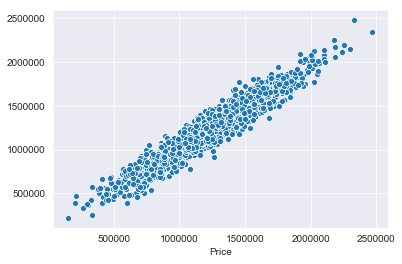

In [81]:
# Does it matter which has x and which has y?
# sns.scatterplot(predictions,y_test)
sns.scatterplot(y_test,predictions)

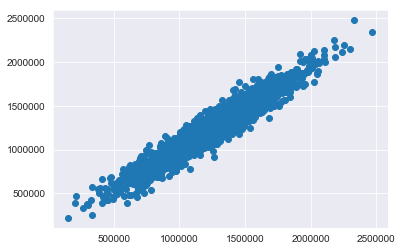

In [82]:
# his solution with matplotlib
plt.scatter(y_test,predictions)

**Now make a histogram to show the Distribution of the residuals**

(array([ 12.,  73., 165., 348., 447., 356., 177.,  54.,  15.,   3.]),
 array([ 219684.45635142,  445144.50610225,  670604.55585308,
         896064.60560391, 1121524.65535474, 1346984.70510556,
        1572444.75485639, 1797904.80460722, 2023364.85435805,
        2248824.90410888, 2474284.9538597 ]),
 <a list of 10 Patch objects>)

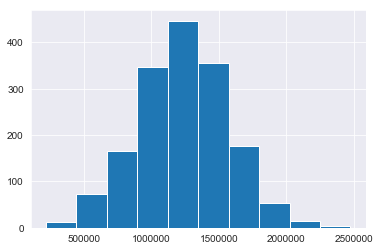

In [86]:
# In Matplotlib
plt.hist(predictions)

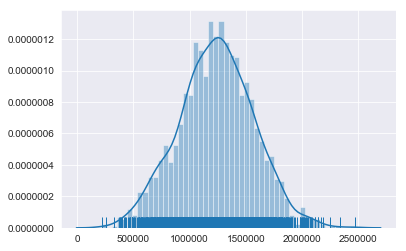

In [95]:
# In Seaborn
sns.distplot(predictions,rug=True, bins=50)

**A histogram of the residuals**  
 Notice that they're normally distributed, which is a good sign.
 
 Normal Distribution would indicate that your Model was a good fit for the Data
 
 **if the residuals are not in a normal distribution, check the data to see if Linear Regression was a good choice**

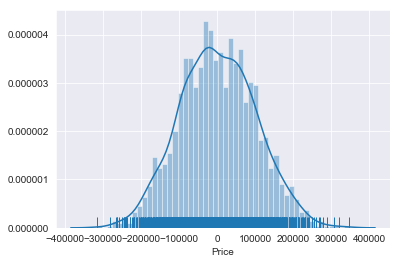

In [96]:
# 
sns.distplot(y_test - predictions,rug=True, bins=50)

### Regression Evaluation Metrics

There are 3 common Evaluation Metrics for Regression problems:  
-Mean Absolute Error (MAE) - Mean of the Absolute Value of the errors  
-Mean Squared Error (MSE) - Mean of the Squared Errors  
-Root Mean Squared Error (RMSE) - SqRt of the Mean of the Squared Errors  

----

**MAE** - is easiest to understand, because it's the Average Error

**MSE** - more popular than *MAE* because it "punishes" larger errors, which tends to be useful in the real world. 

**RMSE** - even more popular than the *MSE* because RMSE is interpretable in the y units (Whatever the Target was)  

All of these are **loss functions** because we want to minimize them.

We want to minimize all the errors - the fewest number of errors will create the best model






In [98]:
# import metrics from sklearn
from sklearn import metrics

### The statistics:

In [100]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_absolute_error(y_test, predictions)))

MAE: 80893.81190770096
MSE: 10013679978.582594
RMAE: 284.4183747715695


### Extended notes

**RMSE**  
https://en.wikipedia.org/wiki/Root-mean-square_deviation

The root-mean-square deviation (RMSD) or root-mean-square error (RMSE) (or sometimes root-mean-squared error) is a frequently used measure of the differences between values (sample or population values) predicted by a model or an estimator and the values observed. The RMSD represents the square root of the second sample moment of the differences between predicted values and observed values or the quadratic mean of these differences. These deviations are called residuals when the calculations are performed over the data sample that was used for estimation and are called errors (or prediction errors) when computed out-of-sample. The RMSD serves to aggregate the magnitudes of the errors in predictions for various times into a single measure of predictive power. RMSD is a measure of accuracy, to compare forecasting errors of different models for a particular dataset and not between datasets, as it is scale-dependent.

RMSD is always non-negative, and a value of 0 (almost never achieved in practice) would indicate a perfect fit to the data. In general, a lower RMSD is better than a higher one. However, comparisons across different types of data would be invalid because the measure is dependent on the scale of the numbers used.

RMSD is the square root of the average of squared errors. The effect of each error on RMSD is proportional to the size of the squared error; thus larger errors have a disproportionately large effect on RMSD. Consequently, RMSD is sensitive to outliers.

----
**Errors and Residuals**  
https://en.wikipedia.org/wiki/Errors_and_residuals

  In statistics and optimization, *errors* and *residuals* are two closely related and easily confused *measures of the deviation of an observed value of an element of a statistical sample from its "theoretical value"*.
  
  **Error:** The error (or *disturbance*) of an observed value is the __deviation of the observed value from the (unobservable) true value of a quantity of interest__ (for example, a population mean)  
  **The Residual:** of an observed value is __the difference between the observed value and the estimated value of the quantity of interest__ (for example, a sample mean). 
  
  The distinction is most important in regression analysis, where the concepts are sometimes called the regression errors and regression residuals and where they lead to the concept of studentized residuals. 
  
  
  
